<a href="https://colab.research.google.com/github/furkanaydinn/Electricity-Load/blob/main/electricity_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Klasik Yöntemler 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Tarih Sütunu Atıldığında

In [ ]:
# Verinin okunması 
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx")
df = data.copy()
# Tarihin veri setinden atılması 
df = df.drop(columns='DATE')

In [ ]:
df

,Hour,Load,T1,T2,T3,T4,T5,T6
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0
...,...,...,...,...,...,...,...,...
26299,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0
26300,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0
26301,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0
26302,23.0,276.176,25.75,25.5,24.8,24.0,27.11,28.0


In [ ]:
df_mean = df[['T1','T2','T3','T4','T5','T6']].mean()
df_mean

T1    62.391913
T2    62.533845
T3    61.432254
T4    61.365990
T5    63.239355
T6    63.570141
dtype: float64

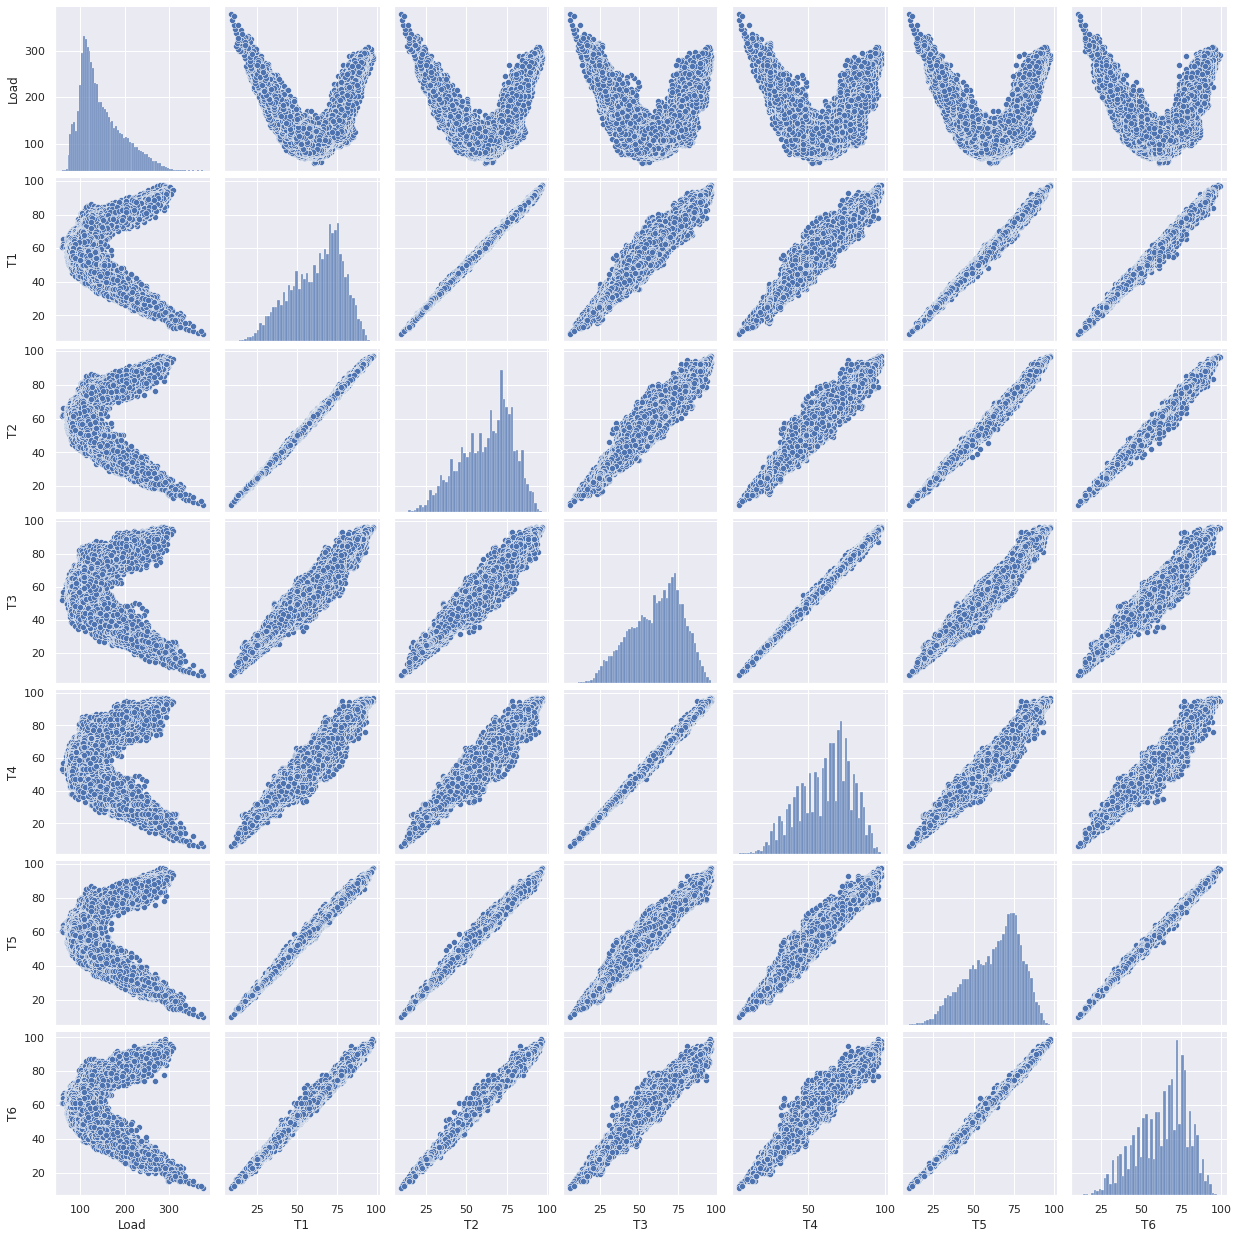

In [ ]:
# Sıcaklık-elektrik yükü grafiği arasında 
# 60 dereceye kadar sıcaklık arttıkça
# elektrik yükünün aşağı yönlü bir eğilimle 
# azaldığı görülmektedir
# 60 derece buradaki eşik değerdir.
sns.pairplot(df[['Load','T1','T2','T3','T4','T5','T6']])

Text(0, 0.5, 'Elektrik Yükü')

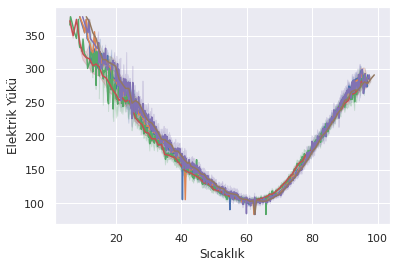

In [ ]:
# Bu grafikten hareketle 
# elektrik yükünün 20 ile 60 derece 
# arasında azalma eğiliminde
# olduğu görülmektedir


fig, ax = plt.subplots()
ax= sns.lineplot(x='T1', y='Load', data=df)
ax1 = sns.lineplot(x='T2', y='Load', data=df)
ax2 = sns.lineplot(x='T3', y='Load', data=df)
ax3 = sns.lineplot(x='T4', y='Load', data=df)
ax4 = sns.lineplot(x='T5', y='Load', data=df)
ax5 = sns.lineplot(x='T6', y='Load', data=df)

plt.xlabel("Sıcaklık")
plt.ylabel("Elektrik Yükü")

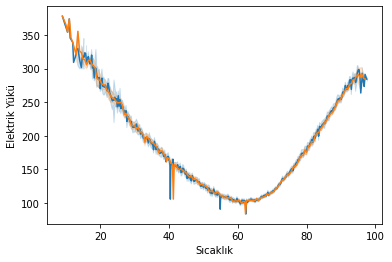

In [ ]:
sns.lineplot(x="T1", y="Load", data=df)
sns.lineplot(x="T2", y="Load", data=df)

plt.xlabel("Sıcaklık")
plt.ylabel("Elektrik Yükü")

plt.show()

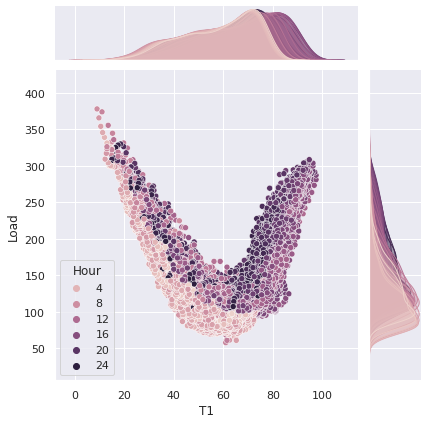

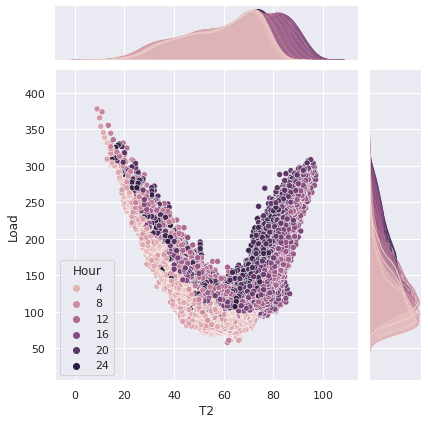

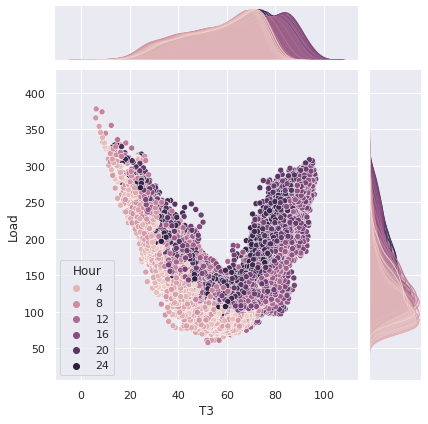

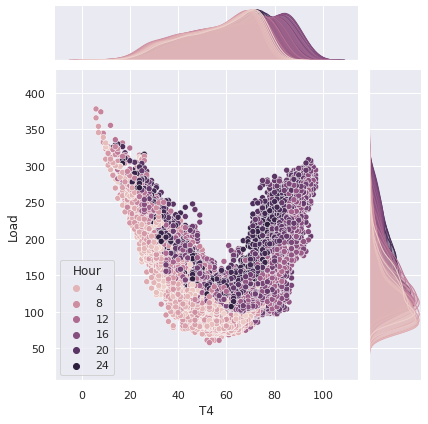

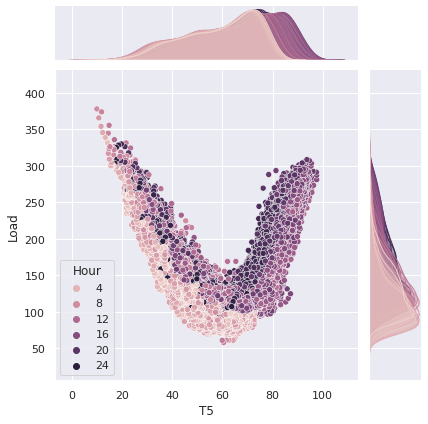

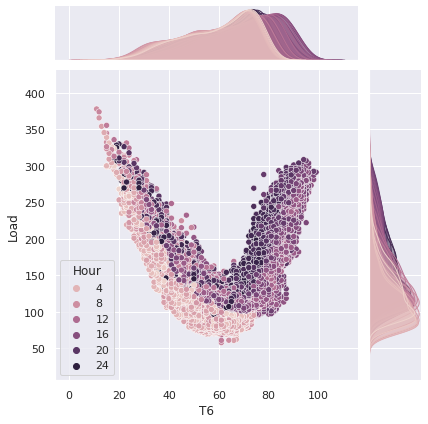

In [ ]:
sns.jointplot(data=df, x="T1", y="Load", hue="Hour")
sns.jointplot(data=df, x="T2", y="Load", hue="Hour")
sns.jointplot(data=df, x="T3", y="Load", hue="Hour")
sns.jointplot(data=df, x="T4", y="Load", hue="Hour")
sns.jointplot(data=df, x="T5", y="Load", hue="Hour")
sns.jointplot(data=df, x="T6", y="Load", hue="Hour")

In [ ]:
df['Load']

0        207.186
1        205.035
2        203.879
3        201.576
4        203.431
          ...   
26299    282.258
26300    280.976
26301    280.294
26302    276.176
26303    270.167
Name: Load, Length: 26304, dtype: float64

### Keşifsel Veri Analizi 


In [ ]:
df.head(5)

,Hour,Load,T1,T2,T3,T4,T5,T6
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0


In [ ]:
# Veriler arasında Nan değer bulunmamaktadır.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hour    26304 non-null  float64
 1   Load    26304 non-null  float64
 2   T1      26304 non-null  float64
 3   T2      26304 non-null  float64
 4   T3      26304 non-null  float64
 5   T4      26304 non-null  float64
 6   T5      26304 non-null  float64
 7   T6      26304 non-null  float64
dtypes: float64(8)
memory usage: 1.6 MB


In [ ]:
df.shape # 8 farklı özellik 26304 adet veri 

(26304, 8)

In [ ]:
# Bu tabloadan hareketle
# elektrik yükü(Load) değişkeninde bulunan değerlerin
# arasındaki dağılımın daha düzensiz olduğunu
# verilerin %50 %75 %99 lik dilimleri arasındaki
# farklara bakarak görülmektedir.
df.describe([0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Hour,26304.0,12.500000,6.922318,1.000,6.75,12.5000,18.250,22.0000,23.00000,24.00000,24.000
Load,26304.0,147.112344,48.683213,58.011,110.64,133.6825,175.489,220.5484,245.09195,281.73687,378.044
T1,26304.0,62.391913,16.224920,9.000,50.50,65.2500,74.750,81.7500,85.25000,90.75000,97.500
T2,26304.0,62.533845,16.237008,9.000,50.50,65.5000,75.000,82.0000,85.50000,91.00000,97.000
T3,26304.0,61.432254,16.551117,6.000,49.40,63.8000,73.800,81.8000,85.80000,91.20000,96.600
T4,26304.0,61.365990,16.636877,6.000,49.00,64.0000,74.000,82.0000,86.00000,91.00000,97.000
T5,26304.0,63.239355,15.870400,9.890,51.89,66.0000,75.440,82.1100,85.56000,90.67000,97.560
T6,26304.0,63.570141,15.882572,11.000,52.00,66.0000,76.000,82.0000,86.00000,91.00000,99.000


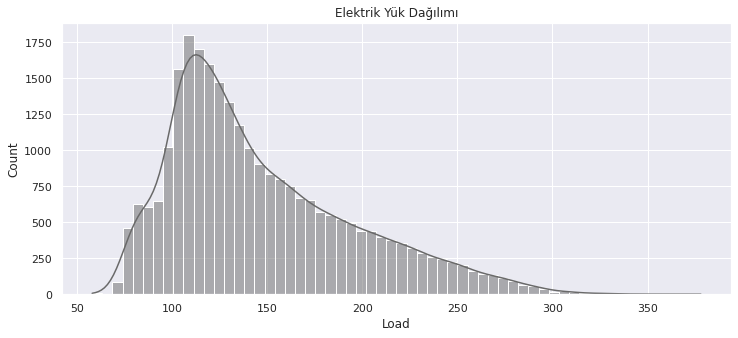

In [ ]:
# Eletrik Yükü Dağılımı İncelenmesi
plt.figure(figsize=(12,5))
sns.set_theme(style="darkgrid")
sns.histplot(df["Load"] ,kde=True,bins=60,color='dimgray')
plt.xlabel("Load")
plt.title("Elektrik Yük Dağılımı")
plt.show()

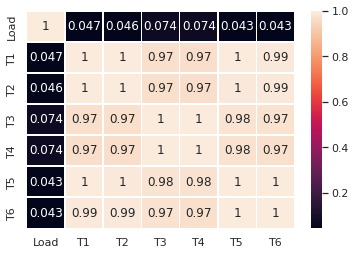

In [ ]:
#İstasyon Sıcaklıkları ile Elektrik Yükü arasındaki dağılımlar
x = df[['Load','T1','T2','T3','T4','T5','T6']].corr()
sns.heatmap(x,linewidths=.5,annot=True);

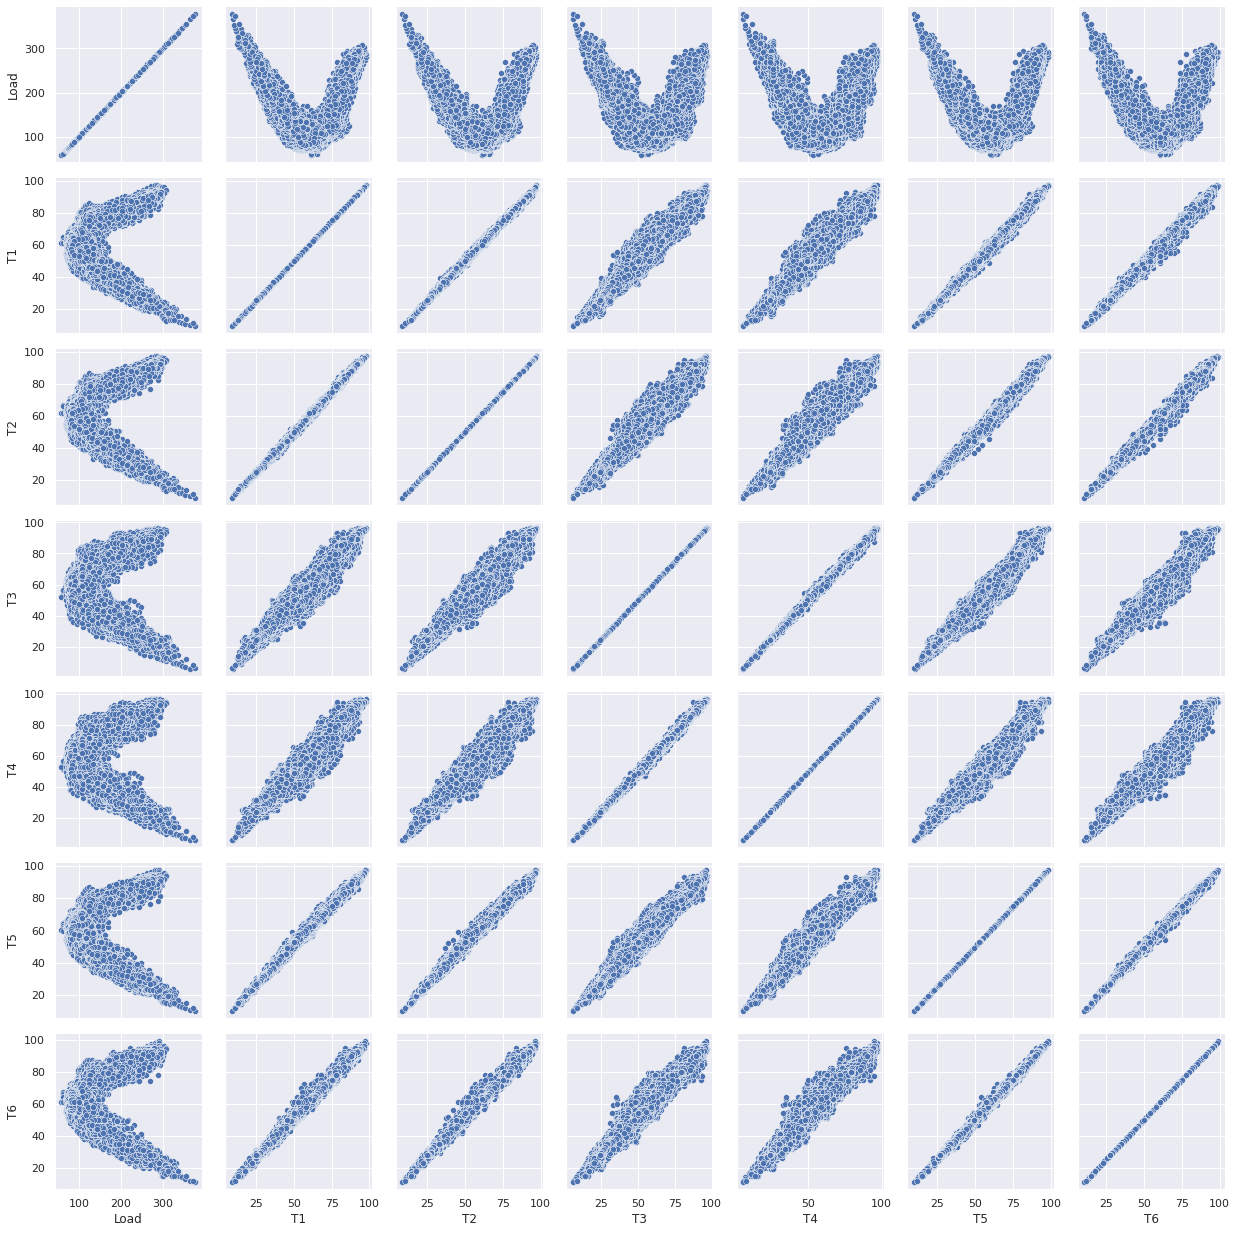

In [ ]:
g = sns.PairGrid(df[['Load','T1','T2','T3','T4','T5','T6']])
g.map(sns.scatterplot);

In [ ]:
def pre_processing(df):
    X = df.drop(['Load'],axis=1)
    y = df['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.8488364564722412
KNN 0.9170363032221498
SVR 0.8508592153148958
LR 0.11802542555762263
RF 0.9231417576413621
MLP 0.777774840954236
[0.8488364564722412, 0.9170363032221498, 0.8508592153148958, 0.11802542555762263, 0.9231417576413621, 0.777774840954236]


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


2018 Verisi ile Test etmek

In [ ]:
# Random Forest İçin 2018 Tahminleri

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)
test_2018 = test_2018.drop(columns='DATE')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
rf = RandomForestRegressor().fit(X_train,y_train)
pred_rf = rf.predict(test_2018)

In [ ]:
pred_rf = pd.DataFrame (pred_rf, columns = ['Load_Predict_2018_RF'])
pred_rf

,Load_Predict_2018_RF
0,258.65217
1,261.24093
2,262.41959
3,259.62171
4,259.67535
...,...
1411,126.39267
1412,133.32068
1413,129.68898
1414,118.88649


In [ ]:
# KNN K en yakın komşu 2018 yılı tahminleri
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018_KNN'])
knn_pred

,Load_Predict_2018_KNN
0,249.4026
1,253.8800
2,256.1488
3,253.9810
4,265.5194
...,...
1411,125.3026
1412,125.6572
1413,111.8190
1414,113.5028


In [ ]:
# Destek Vektör Makinesi 2018 yılı tahminleri
svr = SVR().fit(X_train,y_train)
svr_pred = svr.predict(test_2018)

svr_pred = pd.DataFrame (svr_pred, columns = ['Load_Predict_2018_SVR'])
svr_pred

,Load_Predict_2018_SVR
0,247.098966
1,251.103537
2,255.954644
3,258.857517
4,263.772950
...,...
1411,121.423399
1412,125.011670
1413,128.184720
1414,129.330299


In [ ]:
# Karar Ağaçları 2018 yılı tahminleri
decision_tree = DecisionTreeRegressor().fit(X_train,y_train)
decision_tree_pred = decision_tree.predict(test_2018)

decision_tree_pred = pd.DataFrame (decision_tree_pred, columns = ['Load_Predict_2018_DT'])
decision_tree_pred

,Load_Predict_2018_DT
0,257.630
1,262.150
2,260.664
3,262.842
4,259.132
...,...
1411,133.112
1412,125.220
1413,125.220
1414,122.020


In [ ]:
# Çok katmanlı perceptron 2018 yılı tahminleri
mlp = MLPRegressor().fit(X_train,y_train)
mlp_pred = mlp.predict(test_2018)

mlp_pred = pd.DataFrame (mlp_pred, columns = ['Load_Predict_2018_MLP'])
mlp_pred

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Load_Predict_2018_MLP
0,252.397910
1,259.397642
2,265.030039
3,266.716272
4,274.061331
...,...
1411,131.942287
1412,134.069131
1413,137.162884
1414,134.728242


In [ ]:
# Test Sonuçlarının  Karşılaştırması
pred_all_models = pd.concat([pred_rf,knn_pred,svr_pred,decision_tree_pred,mlp_pred], axis=1)
pred_all_models

,Load_Predict_2018_RF,Load_Predict_2018_KNN,Load_Predict_2018_SVR,Load_Predict_2018_DT,Load_Predict_2018_MLP
0,258.65217,249.4026,247.098966,257.630,252.397910
1,261.24093,253.8800,251.103537,262.150,259.397642
2,262.41959,256.1488,255.954644,260.664,265.030039
3,259.62171,253.9810,258.857517,262.842,266.716272
4,259.67535,265.5194,263.772950,259.132,274.061331
...,...,...,...,...,...
1411,126.39267,125.3026,121.423399,133.112,131.942287
1412,133.32068,125.6572,125.011670,125.220,134.069131
1413,129.68898,111.8190,128.184720,125.220,137.162884
1414,118.88649,113.5028,129.330299,122.020,134.728242


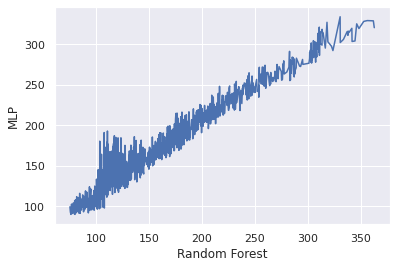

In [ ]:
# Burada en başarılı model olan Random Forest ile en az başarılı olan MLP arasındaki
# grafik görülmektedir.
sns.lineplot(x="Load_Predict_2018_RF", y="Load_Predict_2018_MLP", data=pred_all_models)

plt.xlabel("Random Forest")
plt.ylabel("MLP")

plt.show()

# Tarih Sütunu Dahil Edildiğinde

In [ ]:
df2 = data.copy()
df2['DATE'] = df2['DATE'].values.astype("float64")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    26304 non-null  float64
 1   Hour    26304 non-null  float64
 2   Load    26304 non-null  float64
 3   T1      26304 non-null  float64
 4   T2      26304 non-null  float64
 5   T3      26304 non-null  float64
 6   T4      26304 non-null  float64
 7   T5      26304 non-null  float64
 8   T6      26304 non-null  float64
dtypes: float64(9)
memory usage: 1.8 MB


In [ ]:
def pre_processing(df2):
    X = df2.drop(['Load'],axis=1)
    y = df2['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df2)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.8962125410630577
KNN 0.9282729098481927
SVR -0.07082458373698897
LR 0.10924540824459505
RF 0.9523508959764175
MLP -9.375373718417592e+19
[0.8962125410630577, 0.9282729098481927, -0.07082458373698897, 0.10924540824459505, 0.9523508959764175, -9.375373718417592e+19]


In [ ]:
# Random Forest İçin Tahminleme

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)
test_2018['DATE'] = test_2018['DATE'].values.astype("float64")


rf = RandomForestRegressor().fit(X_train,y_train)
rf_pred= rf.predict(test_2018)

rf_pred = pd.DataFrame (rf_pred, columns = ['Load_Predict_2018_RF'])
rf_pred

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Load_Predict_2018_RF
0,260.03868
1,262.76661
2,261.89549
3,263.81103
4,265.92605
...,...
1411,134.90629
1412,137.07809
1413,133.70454
1414,126.35872


In [ ]:
# KNN K en yakın komşu 2018 yılı tahminleri
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018_KNN'])
knn_pred

,Load_Predict_2018_KNN
0,254.054
1,254.054
2,254.054
3,254.054
4,254.054
...,...
1411,254.054
1412,254.054
1413,254.054
1414,254.054


In [ ]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
dt_pred = dt.predict(test_2018)

dt_pred = pd.DataFrame (dt_pred, columns = ['Load_Predict_2018_DT'])
dt_pred

,Load_Predict_2018_DT
0,260.988
1,257.382
2,260.664
3,259.132
4,279.527
...,...
1411,144.250
1412,142.089
1413,142.089
1414,132.566


### Tarihi Yıl-Ay-Gün olarak ayrı sütunlarda ayırma yöntemi

In [ ]:
import datetime as dt

df3 = data.copy()
df3['ConvertedDate'] = df3['DATE'].dt.strftime('%m/%d/%Y')
df3["day"] = ""
df3["month"] = ""
df3["year"] = ""

df3['ConvertedDate'] = df3['ConvertedDate'].str.replace("/","")
df3["year"] = df3["ConvertedDate"].str[4:8]
df3["month"] = df3["ConvertedDate"].str[0:2]
df3["day"] = df3["ConvertedDate"].str[2:4]

df3["year"] = df3["year"].astype(float)
df3["month"] = df3["month"].astype(float)
df3["day"] = df3["day"].astype(float)

df3 = df3.drop(['DATE','ConvertedDate'],axis=1) 

In [ ]:
df3

,Hour,Load,T1,T2,T3,T4,T5,T6,day,month,year
0,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0,1.0,1.0,2015.0
1,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0,1.0,1.0,2015.0
2,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0,1.0,1.0,2015.0
3,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0,1.0,1.0,2015.0
4,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0,1.0,1.0,2015.0
...,...,...,...,...,...,...,...,...,...,...,...
26299,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0,31.0,12.0,2017.0
26300,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0,31.0,12.0,2017.0
26301,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0,31.0,12.0,2017.0
26302,23.0,276.176,25.75,25.5,24.8,24.0,27.11,28.0,31.0,12.0,2017.0


In [ ]:
def pre_processing(df3):
    X = df3.drop(['Load'],axis=1)
    y = df3['Load']

    X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
    
    return  X_train,X_test, y_train, y_test

In [ ]:
X_train,X_test, y_train, y_test = pre_processing(df3)

In [ ]:
models = []

def regression_Models(X_train,X_test, y_train, y_test):

    models.append( ('DT',  DecisionTreeRegressor()) )
    models.append( ('KNN',KNeighborsRegressor()) )
    models.append( ('SVR', SVR()) )
    models.append( ('LR',  LinearRegression()) )
    models.append( ('RF',  RandomForestRegressor()) )
    models.append( ('MLP',  MLPRegressor()) )
    

    modeloutcomes = []
    modelnames = []

    for name,model in models:
        v_model = model.fit(X_train,y_train)
        v_pred  = v_model.predict(X_test)
        v_r2_score = r2_score(y_test,v_pred)

        print(name,v_r2_score)
        modeloutcomes.append(v_r2_score)
        modelnames.append(name)
        
    print(modeloutcomes)

regression_Models(X_train,X_test, y_train, y_test)

DT 0.920535495271598
KNN 0.9413665201370792
SVR -0.06904231716311493
LR 0.1237040191909291
RF 0.9616701217353173
MLP 0.8517166396986481
[0.920535495271598, 0.9413665201370792, -0.06904231716311493, 0.1237040191909291, 0.9616701217353173, 0.8517166396986481]


In [ ]:
# Random Forest İçin Tahminleme

test_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)

test_2018['ConvertedDate'] = test_2018['DATE'].dt.strftime('%m/%d/%Y')
test_2018["day"] = ""
test_2018["month"] = ""
test_2018["year"] = ""

test_2018['ConvertedDate'] = test_2018['ConvertedDate'].str.replace("/","")
test_2018["year"] = test_2018["ConvertedDate"].str[4:8]
test_2018["month"] = test_2018["ConvertedDate"].str[0:2]
test_2018["day"] = test_2018["ConvertedDate"].str[2:4]

test_2018["year"] = test_2018["year"].astype(float)
test_2018["month"] = test_2018["month"].astype(float)
test_2018["day"] = test_2018["day"].astype(float)

test_2018 = test_2018.drop(['DATE','ConvertedDate'],axis=1) 


rf = RandomForestRegressor().fit(X_train,y_train)
rf_pred = rf.predict(test_2018)

rf_pred = pd.DataFrame (rf_pred, columns = ['Load_Predict_2018_RF'])
rf_pred

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,Load_Predict_2018_RF
0,253.26300
1,261.09836
2,261.40224
3,262.63486
4,265.69642
...,...
1411,119.05749
1412,120.49292
1413,121.92498
1414,109.84427


In [ ]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
dt_pred = dt.predict(test_2018)

dt_pred = pd.DataFrame (dt_pred, columns = ['Load_Predict_2018_DT'])
dt_pred

,Load_Predict_2018_DT
0,261.924
1,279.527
2,279.527
3,279.527
4,279.527
...,...
1411,120.943
1412,122.642
1413,128.455
1414,98.768


In [ ]:
knn = KNeighborsRegressor().fit(X_train,y_train)
knn_pred = knn.predict(test_2018)

knn_pred = pd.DataFrame (knn_pred, columns = ['Load_Predict_2018_KNN'])
knn_pred

,Load_Predict_2018_KNN
0,235.4434
1,255.9376
2,264.2858
3,264.2858
4,274.5554
...,...
1411,111.0696
1412,126.8820
1413,114.5756
1414,114.2280


In [ ]:
# MLP 2018 yılı elektrik yükü tahminleri
mlp = MLPRegressor().fit(X_train,y_train)
mlp_pred = mlp.predict(test_2018)

mlp_pred = pd.DataFrame (mlp_pred, columns = ['Load_Predict_2018_MLP'])
mlp_pred

,Load_Predict_2018_MLP
0,251.209279
1,256.474067
2,263.499076
3,267.744406
4,275.356567
...,...
1411,119.221560
1412,122.975173
1413,126.897533
1414,126.739319


# LSTM MODELİ

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,GRU
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from datetime import datetime

In [ ]:
# 2015 - 2017 Verileri
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx")
data

,DATE,Hour,Load,T1,T2,T3,T4,T5,T6
0,2015-01-01,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
1,2015-01-01,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2,2015-01-01,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
3,2015-01-01,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
4,2015-01-01,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0
...,...,...,...,...,...,...,...,...,...
26299,2017-12-31,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0
26300,2017-12-31,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0
26301,2017-12-31,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0
26302,2017-12-31,23.0,276.176,25.75,25.5,24.8,24.0,27.11,28.0


In [ ]:
# Giriş ve Çıkış parametreleri
data=data.values
X = data[:,[1,3,4,5,6,7,8]]
Y = data[:,2]

In [ ]:
X=np.asarray(X).astype(np.float_)
Y=np.asarray(Y).astype(np.float_)

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y,test_size=0.20,random_state=42)
X_Train = X_Train.reshape((X_Train.shape[0], X_Train.shape[1],1))
X_Test = X_Test.reshape((X_Test.shape[0],  X_Test.shape[1],1))

In [ ]:
model = Sequential()
model.add(LSTM(100,return_sequences=True, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.fit(X_Train, Y_Train, epochs=150, batch_size=8, verbose=2, shuffle=False)
prediction = model.predict(X_Test)
score=r2_score(prediction,Y_Test)
print("Test data score: %.2f" % score)

Epoch 1/150
2631/2631 - 22s - loss: 5551.0117 - 22s/epoch - 8ms/step
Epoch 2/150
2631/2631 - 15s - loss: 1218.7499 - 15s/epoch - 6ms/step
Epoch 3/150
2631/2631 - 14s - loss: 561.6865 - 14s/epoch - 5ms/step
Epoch 4/150
2631/2631 - 14s - loss: 479.0336 - 14s/epoch - 5ms/step
Epoch 5/150
2631/2631 - 14s - loss: 441.4265 - 14s/epoch - 5ms/step
Epoch 6/150
2631/2631 - 14s - loss: 416.6939 - 14s/epoch - 6ms/step
Epoch 7/150
2631/2631 - 14s - loss: 400.4996 - 14s/epoch - 5ms/step
Epoch 8/150
2631/2631 - 14s - loss: 386.3809 - 14s/epoch - 5ms/step
Epoch 9/150
2631/2631 - 14s - loss: 376.5907 - 14s/epoch - 5ms/step
Epoch 10/150
2631/2631 - 14s - loss: 369.6161 - 14s/epoch - 5ms/step
Epoch 11/150
2631/2631 - 14s - loss: 361.7515 - 14s/epoch - 5ms/step
Epoch 12/150
2631/2631 - 14s - loss: 360.2099 - 14s/epoch - 5ms/step
Epoch 13/150
2631/2631 - 21s - loss: 353.1887 - 21s/epoch - 8ms/step
Epoch 14/150
2631/2631 - 15s - loss: 358.5771 - 15s/epoch - 6ms/step
Epoch 15/150
2631/2631 - 14s - loss: 348.

In [ ]:
## 2018 verileri kullanılarak tahmin
data_2018 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx",sheet_name=1)

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
data_2018=data_2018.values
X_2018 = data_2018[:,1:]
X_2018=np.asarray(X_2018).astype(np.float_)

X_Test2018= X_2018.reshape((X_2018.shape[0],X_2018.shape[1], 1))

prediction_2018 = model.predict(X_Test2018)

45/45 [==============================] - 0s 2ms/step


In [ ]:
prediction_2018

array([[264.08597],
       [267.72098],
       [268.29562],
       ...,
       [122.08377],
       [115.95668],
       [113.65512]], dtype=float32)

# GRU

In [ ]:
model_gru = Sequential()
model_gru.add(GRU(75, return_sequences=True,input_shape=(X_Train.shape[1], X_Train.shape[2])))
model_gru.add(GRU(units=30, return_sequences=True))
model_gru.add(GRU(units=30))
model_gru.add(Dense(units=1))

model_gru.compile(loss='mse', optimizer='rmsprop')

In [ ]:
model.fit(X_Train, Y_Train, epochs=100, batch_size=8, verbose=2, shuffle=False)
prediction = model.predict(X_Test)
score=r2_score(prediction,Y_Test)
print("Test data score: %.2f" % score)

Epoch 1/100
2631/2631 - 15s - loss: 258.5950 - 15s/epoch - 6ms/step
Epoch 2/100
2631/2631 - 14s - loss: 263.8217 - 14s/epoch - 5ms/step
Epoch 3/100
2631/2631 - 14s - loss: 263.8337 - 14s/epoch - 5ms/step
Epoch 4/100
2631/2631 - 15s - loss: 265.0381 - 15s/epoch - 6ms/step
Epoch 5/100
2631/2631 - 14s - loss: 263.8711 - 14s/epoch - 5ms/step
Epoch 6/100
2631/2631 - 14s - loss: 261.9968 - 14s/epoch - 5ms/step
Epoch 7/100
2631/2631 - 19s - loss: 257.7189 - 19s/epoch - 7ms/step
Epoch 8/100
2631/2631 - 14s - loss: 261.8027 - 14s/epoch - 5ms/step
Epoch 9/100
2631/2631 - 14s - loss: 256.6337 - 14s/epoch - 5ms/step
Epoch 10/100
2631/2631 - 14s - loss: 260.5538 - 14s/epoch - 5ms/step
Epoch 11/100
2631/2631 - 15s - loss: 263.7548 - 15s/epoch - 6ms/step
Epoch 12/100
2631/2631 - 14s - loss: 259.8184 - 14s/epoch - 5ms/step
Epoch 13/100
2631/2631 - 14s - loss: 260.9511 - 14s/epoch - 5ms/step
Epoch 14/100
2631/2631 - 14s - loss: 258.9772 - 14s/epoch - 5ms/step
Epoch 15/100
2631/2631 - 14s - loss: 259.85

In [ ]:
prediction_gru = model.predict(X_Test2018)

45/45 [==============================] - 0s 2ms/step


In [ ]:
prediction_gru

array([[256.57205],
       [254.76566],
       [254.828  ],
       ...,
       [131.02823],
       [124.37591],
       [118.41859]], dtype=float32)

In [ ]:
# Bu çalışmada 8 farklı yaklaşım metodu denenmiştir.
# 8 çalışmanın 2 si derin öğrenme tabanlı olan lstm ve gru üzerinedir.
# Kullanılan yaklaşım metodları:
# random forest, knn, svr, decision tree, linear regression, multiple layer perceptron
# lstm ve gru
# 

Bu çalışmada 8 farklı yaklaşım metodu denenmiştir. 8 çalışmanın 2 si derin öğrenme tabanlı olan lstm ve gru üzerinedir.
Kullanılan yaklaşım metodları:
*   rastgele ormanlar
*   k en yakın komşu
*   destek vektör makinesi
*   karar ağaçları
*   doğrusal regresyon
*   çok katmanlı perceptron
*  lstm
*  gru

Yaklaşım metodları arasından en başarılı olarak r2_score = 0.96 oranla random Rastgele ormanlar(RF) metodu olmuştur. 

Ayrıca yapılan grafiksel çalışmalar esnasında; 6 istasyonun sıcaklık değerlerine bakıldığı zaman 60 dereceye kadar elektrik yükünün düştüğü açık bir şekilde görülebilmektedir. Bu noktada 60 derecenin bir tolerans eşiği olduğunu söyleyebilir. 60 derece üstü sıcaklıklarda ise elektrik yükünün hızlı bir şekilde arttığı görülmektedir. Sonuç olarak İstasyon sıcaklıklarının ideal olarak 60 derecenin üstüne çıkarılmaması gerektiğini görmekteyiz.




# DNN-RNN-LSTM Model Değerlendirmesi

In [1]:
# Gerekli Kütüphanelerin Eklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM, Dropout
from keras.callbacks import EarlyStopping

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [9]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/case - electricity load forecast.xlsx")

### DNN

In [10]:
df_rnn = data.copy()
df_rnn.set_index('DATE',inplace=True)
df_rnn

,Hour,Load,T1,T2,T3,T4,T5,T6
DATE,,,,,,,,
2015-01-01,1.0,207.186,30.00,30.0,29.8,29.0,29.78,30.0
2015-01-01,2.0,205.035,29.75,30.0,29.0,29.0,29.56,30.0
2015-01-01,3.0,203.879,28.75,29.5,28.6,28.0,28.78,29.0
2015-01-01,4.0,201.576,29.25,29.0,26.8,27.0,28.56,29.0
2015-01-01,5.0,203.431,28.75,28.5,27.0,26.0,28.11,29.0
...,...,...,...,...,...,...,...,...
2017-12-31,20.0,282.258,27.50,27.5,25.0,25.0,28.33,29.0
2017-12-31,21.0,280.976,26.50,26.5,25.0,25.0,27.67,28.0
2017-12-31,22.0,280.294,26.00,26.0,24.8,24.0,27.22,28.0


In [11]:
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back  
  X.append(data_arr[i:d,1])
  Y.append(data_arr[d,1])
 return np.array(X), np.array(Y)

In [12]:
# veriyi train ve test olarak ikiye bölme
train_size = 23376
train, test =df_rnn.values[0:train_size,:],df_rnn.values[train_size:len(df_rnn.values),:]
# 30 gün öncesi veriye göre ayarla
look_back = 30
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [13]:
def model_dnn(look_back):
  model=Sequential()
  model.add(Dense(units=32, input_dim=look_back, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [14]:
model=model_dnn(look_back)
history=model.fit(trainX,
                  trainY, 
                  epochs=100, 
                  batch_size=30, 
                  verbose=1, 
                  validation_data=(testX,testY),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
                  shuffle=False)

Epoch 1/100
779/779 [==============================] - 5s 3ms/step - loss: 844.4136 - mse: 844.4136 - mae: 16.1804 - val_loss: 198.9889 - val_mse: 198.9889 - val_mae: 10.7222
Epoch 2/100
779/779 [==============================] - 2s 3ms/step - loss: 146.7773 - mse: 146.7773 - mae: 8.8452 - val_loss: 90.7793 - val_mse: 90.7793 - val_mae: 7.1871
Epoch 3/100
779/779 [==============================] - 2s 3ms/step - loss: 76.6634 - mse: 76.6634 - mae: 6.3144 - val_loss: 53.4633 - val_mse: 53.4633 - val_mae: 5.4703
Epoch 4/100
779/779 [==============================] - 2s 3ms/step - loss: 55.4828 - mse: 55.4828 - mae: 5.4386 - val_loss: 47.1865 - val_mse: 47.1865 - val_mae: 5.1761
Epoch 5/100
779/779 [==============================] - 2s 3ms/step - loss: 45.9576 - mse: 45.9576 - mae: 4.9832 - val_loss: 34.5359 - val_mse: 34.5359 - val_mae: 4.3762
Epoch 6/100
779/779 [==============================] - 2s 3ms/step - loss: 38.3116 - mse: 38.3116 - mae: 4.5195 - val_loss: 32.0127 - val_mse: 32.0

In [16]:
def model_loss(history):
  plt.figure(figsize=(8,4))
  plt.plot(history.history['loss'], label='Train Loss')
  plt.plot(history.history['val_loss'], label='Test Loss')
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epochs')
  plt.legend(loc='upper right')
  plt.show();

Train Root Mean Squared Error(RMSE): 3.93; Train Mean Absolute Error(MAE) : 2.95 
Test Root Mean Squared Error(RMSE): 3.69; Test Mean Absolute Error(MAE) : 2.60 


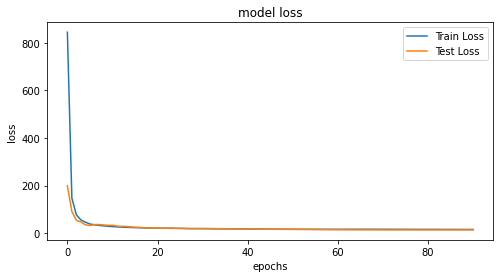

In [17]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)

In [19]:
prediction = model.predict(testX)
test_score = r2_score(prediction,testY)
print(f"Test skoru (R2): {test_score}")
print(f"Tahmin sonuçları: {prediction}")

91/91 [==============================] - 0s 1ms/step
Test skoru (R2): 0.989924251503408
Tahmin sonuçları: [[101.935104]
 [106.9256  ]
 [109.30121 ]
 ...
 [270.13968 ]
 [269.49234 ]
 [263.70724 ]]


###

In [27]:
import seaborn as sns

def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY, marker='.', label="actual")
      plt.plot(len_prediction, test_predict, 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Elektrik Yükü', size=15)
      plt.xlabel('Zaman', size=15)
      plt.legend(fontsize=15)
      plt.show();

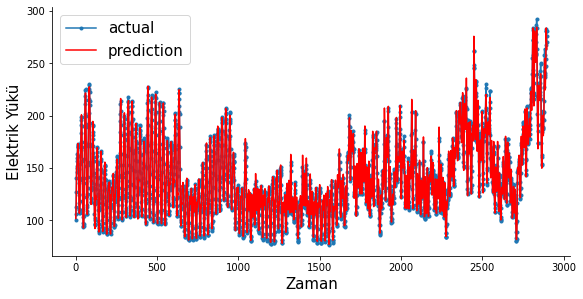

In [28]:
prediction_plot(testY,prediction)

### RNN

In [32]:
df_rnn2 = data.copy()
df_rnn2.set_index('DATE',inplace=True)

In [33]:
def convert2matrix(data_arr, look_back):
   X, Y =[], []
   for i in range(len(data_arr)-look_back):
    d=i+look_back  
    X.append(data_arr[i:d,])
    Y.append(data_arr[d,])
   return np.array(X), np.array(Y)

In [34]:
train_size = 23376
train,test = df_rnn2.values[0:train_size,:], df_rnn2.values[train_size:len(df_rnn2.values),:]
look_back = 30 
test = np.append(test,np.repeat(test[-1,], look_back))
train = np.append(train,np.repeat(train[-1,],look_back))
trainX,trainY =convert2matrix(train,look_back)
testX,testY =convert2matrix(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [35]:
def model_rnn(look_back):
  model=Sequential()
  model.add(SimpleRNN(units=32, input_shape=(1,look_back), activation="relu"))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
  return model

In [36]:
model=model_rnn(look_back)
history=model.fit(trainX,
                  trainY, 
                  epochs=100, 
                  batch_size=30, 
                  verbose=1, 
                  validation_data=(testX,testY),
                  callbacks=[EarlyStopping(monitor='val_loss', patience=10)],
                  shuffle=False)

Epoch 1/100
6241/6241 [==============================] - 26s 4ms/step - loss: 46.8909 - mse: 46.8909 - mae: 3.2536 - val_loss: 323.7368 - val_mse: 323.7368 - val_mae: 11.3870
Epoch 2/100
6241/6241 [==============================] - 26s 4ms/step - loss: 13.2062 - mse: 13.2062 - mae: 2.1764 - val_loss: 127.8910 - val_mse: 127.8910 - val_mae: 6.2507
Epoch 3/100
6241/6241 [==============================] - 27s 4ms/step - loss: 11.1044 - mse: 11.1044 - mae: 1.9409 - val_loss: 123.9872 - val_mse: 123.9872 - val_mae: 8.6606
Epoch 4/100
6241/6241 [==============================] - 24s 4ms/step - loss: 10.2408 - mse: 10.2408 - mae: 1.8651 - val_loss: 110.9198 - val_mse: 110.9198 - val_mae: 8.0256
Epoch 5/100
6241/6241 [==============================] - 27s 4ms/step - loss: 9.6419 - mse: 9.6419 - mae: 1.7986 - val_loss: 91.4310 - val_mse: 91.4310 - val_mae: 7.2809
Epoch 6/100
6241/6241 [==============================] - 25s 4ms/step - loss: 9.0986 - mse: 9.0986 - mae: 1.7260 - val_loss: 75.4772 

739/739 [==============================] - 2s 3ms/step
Train Root Mean Squared Error(RMSE): 9.31; Train Mean Absolute Error(MAE) : 6.70 
Test Root Mean Squared Error(RMSE): 9.31; Test Mean Absolute Error(MAE) : 6.20 


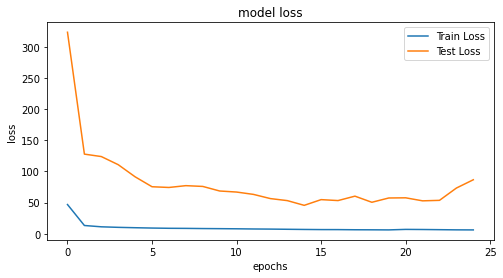

In [37]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f '
      % (np.sqrt(mean_squared_error(trainY, train_predict[:,0])), mean_absolute_error(trainY, train_predict[:,0])))
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
      % (np.sqrt(mean_squared_error(testY, test_predict[:,0])), mean_absolute_error(testY, test_predict[:,0])))
model_loss(history)

In [39]:
prediction = model.predict(testX)
test_score = r2_score(prediction,testY)
print(f"Test skoru (R2): {test_score}")
print(f"Tahmin sonuçları: {prediction}")

739/739 [==============================] - 1s 2ms/step
Test skoru (R2): 0.9246918715076102
Tahmin sonuçları: [[68.77562  ]
 [66.32257  ]
 [ 1.7685847]
 ...
 [30.170986 ]
 [30.136036 ]
 [30.15006  ]]


In [40]:
def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY, marker='.', label="actual")
      plt.plot(len_prediction, test_predict, 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Elektrik Yükü', size=15)
      plt.xlabel('Zaman', size=15)
      plt.legend(fontsize=15)
      plt.show();

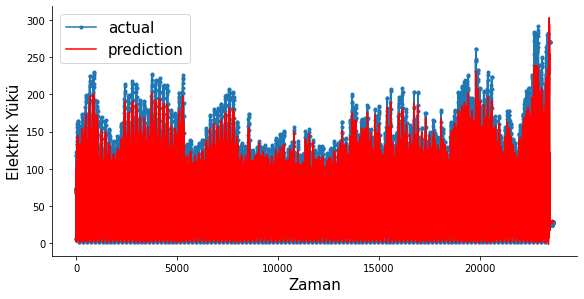

In [41]:
prediction_plot(testY,prediction)

### LSTM

In [42]:
df_lstm = data.copy()
df_lstm.set_index("DATE",inplace=True)

In [43]:
# Çoklu Giriş
def convert2matrix(data_arr, look_back):
   X, Y =[], []
   for i in range(len(data_arr)-look_back):
    d=i+look_back  
    X.append(data_arr[i:d,[0,2,3,4,5,6,7]])
    Y.append(data_arr[d,1])
   return np.array(X), np.array(Y)

In [44]:
df_arr= df_lstm.values 
df_arr = np.reshape(df_arr, (-1, 1)) #LTSM requires more input features compared to RNN or DNN
scaler = MinMaxScaler(feature_range=(0, 1))#LTSM is senstive to the scale of features
df_arr = scaler.fit_transform(df_arr)

In [47]:
train_size = 23376
test_size = len(df_arr) - train_size
train, test = df_arr[0:train_size,[0,2,3,4,5,6,7]], df_arr[train_size:len(df_arr),[0,2,3,4,5,6,7]]
look_back = 30
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

IndexError: ignored